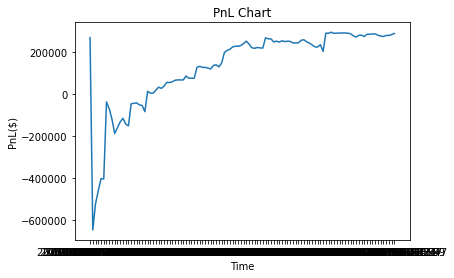

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', None)
# read csv file
df = pd.read_csv('eth_hunt.csv')

# only swaps
df = df[df['event_name'] == 'Swap']

# initiators who have PnL
d = df['trx_initiator'].value_counts()


data = df[['block_timestamp','trx_initiator', 'buy/sell', 'rate', 'huntprice', 'ethprice', 'ETH_in($)', 'ETH_out($)', 'HUNT_in($)', 'HUNT_out($)']]
data
# 'trx_initiator', 'buy/sell', 'rate', 'huntprice', 'ethprice', 'ETH_in($)', 'ETH_out($)', 'HUNT_in($)', 'HUNT_out($)'
eth_out = 0
eth_in = 0
Time = []
PnL_dict = {} 

# cleaning for only buy or sells:
for i in d[d<4].index:
    data = data.drop(data[data.trx_initiator == i].index)


# finding PnL values
for i in d.index:
    if any(data[data['trx_initiator'] == i]['buy/sell'].str.contains('Buy')):
        Time.append(data[data['trx_initiator'] == i].sort_values(by=['block_timestamp'],ascending=False)['block_timestamp'].iloc[0])
        for index, row in data[data['trx_initiator'] == i].iterrows():
            if row[2] == 'Buy':
                eth_in += row[-4]
            else:
                eth_out += row[-3]
            PnL_dict[i] = [eth_in - eth_out]

# Time - time
# PnL_dict.values() - PnL

plt.plot(Time,PnL_dict.values())
plt.ylabel('PnL($)')
plt.xlabel('Time')
plt.title('PnL Chart')
plt.show()
